# Question 1

# Q1 a&b

(512, 512)


Text(0.5, 1.0, 'NEW IMAGE')

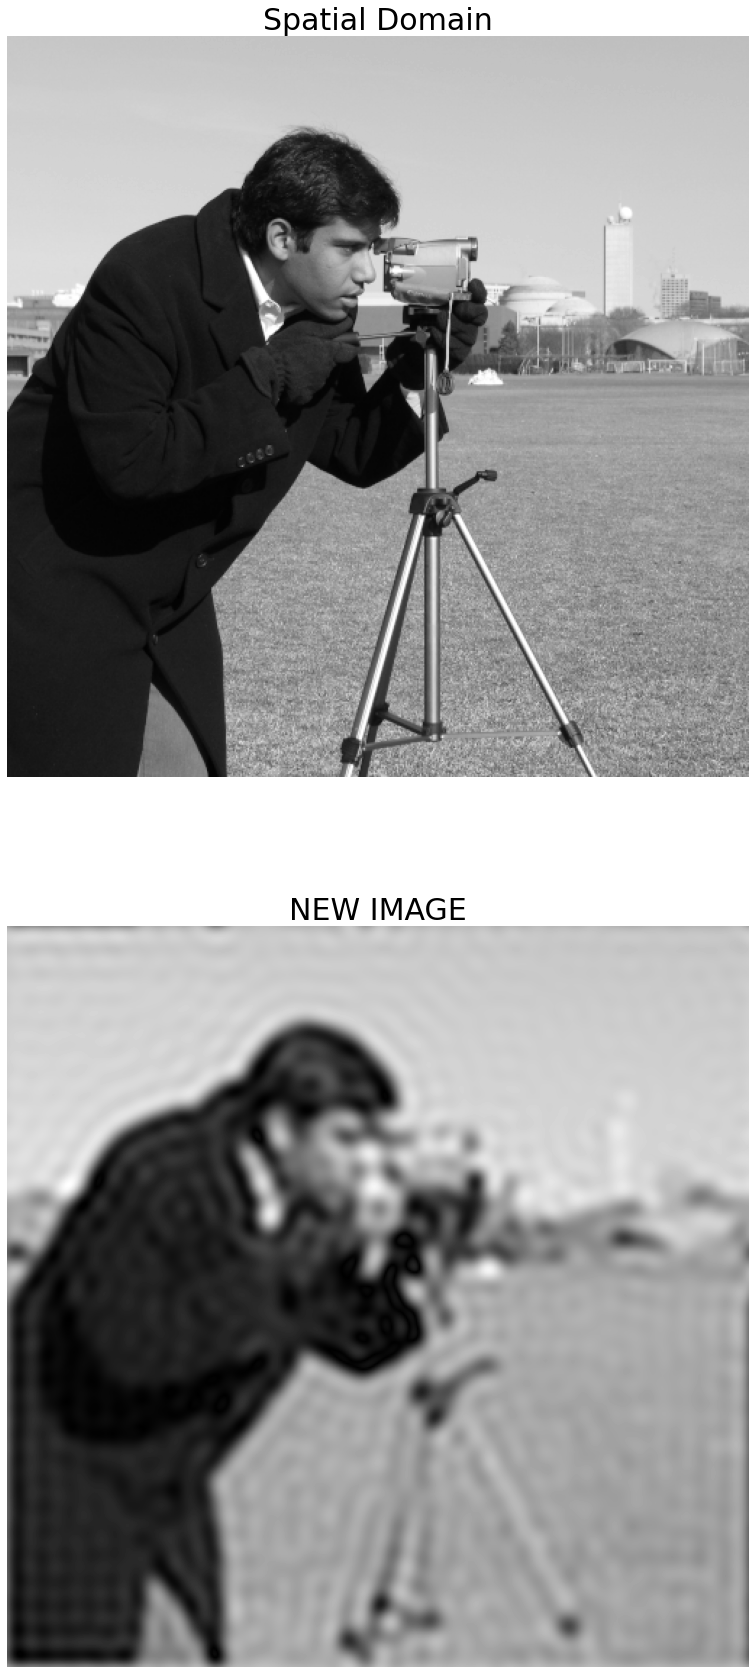

In [1]:
import skimage
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
from skimage import io

def ideal2d_lp(shape, f):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    print(radius.shape)
    filt= np.ones(shape)
    filt[radius>f] = 0
    return filt


image = img_as_float(data.camera())
fft_image = np.fft.fft2(image)
fft_shift_image = np.fft.fftshift(fft_image)
ilpf = ideal2d_lp(image.shape, 30)
fft_new = fft_shift_image * ilpf
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))

fig, ax = plt.subplots(nrows=2, figsize=(30, 30), sharex=True,
                       sharey=True)


ax[0].imshow(image,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Spatial Domain',size=30)

ax[1].imshow(np.log(np.abs(new_image)+1),cmap='gray')
ax[1].axis('off')
ax[1].set_title('NEW IMAGE',size=30)


# Q1 c

(1024, 1024)


Text(0.5, 1.0, 'Padding image')

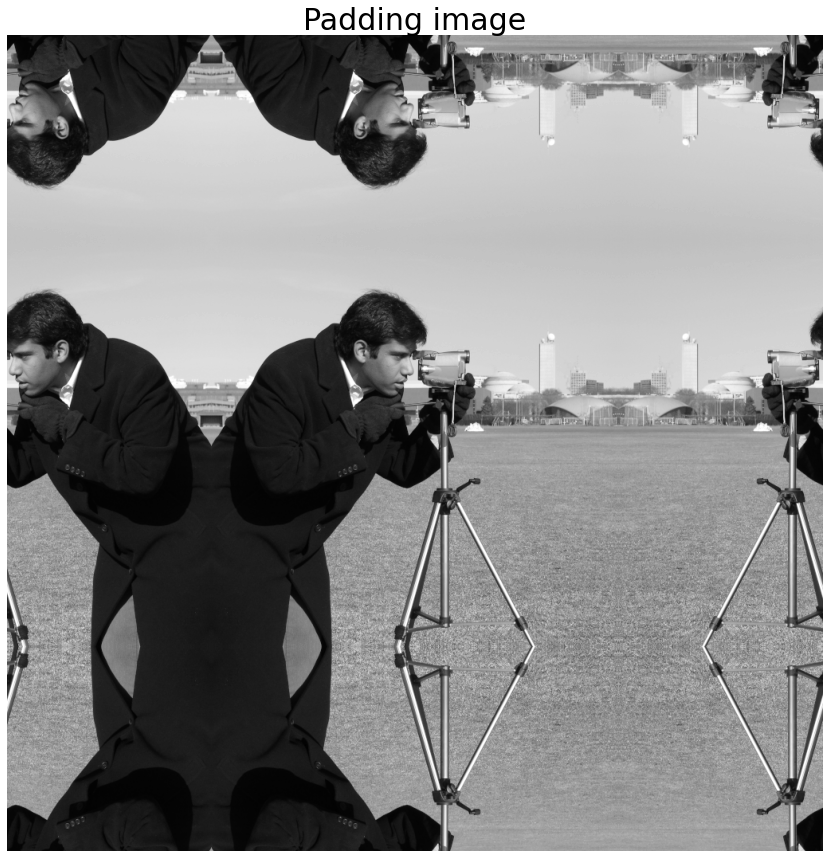

In [2]:
b=image.shape
c=[int(b[0]/2),int(b[1]/2)]
image_padding = np.pad(image,c,'reflect')
print(image_padding.shape)
fig, bx = plt.subplots( figsize=(15, 15), sharex=True,sharey=True)
bx.imshow(image_padding,cmap='gray')
bx.axis('off')
bx.set_title('Padding image',size=30)

# Q1 d

(1024, 1024)


Text(0.5, 1.0, 'Filtered Padding picture')

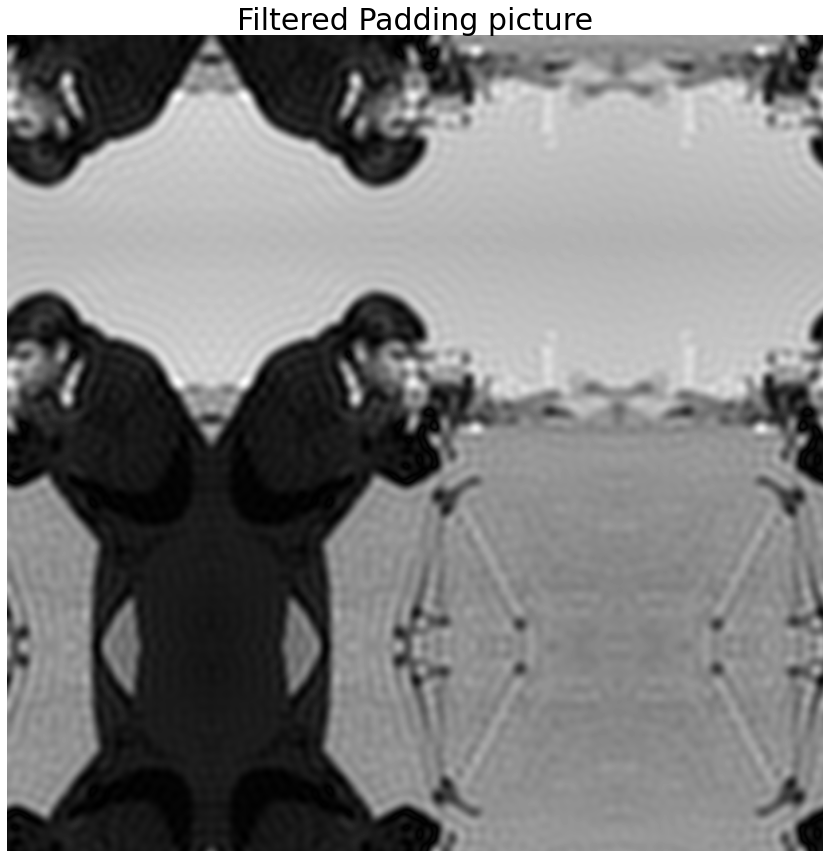

In [5]:
ilpf1 = ideal2d_lp(image_padding.shape,60)
fft_image_padding = np.fft.fft2(image_padding)
fft_shift_image_padding = np.fft.fftshift(fft_image_padding)
fft_new_image_padding = fft_shift_image_padding * ilpf1
new_image_padding_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new_image_padding)))
fig, cx = plt.subplots( figsize=(15, 15), sharex=True,sharey=True)

cx.imshow(new_image_padding_filtered,cmap='gray')
cx.axis('off')
cx.set_title('Filtered Padding picture',size=30)


# Q1 e

(512, 512)


Text(0.5, 1.0, 'NEW IMAGE 1')

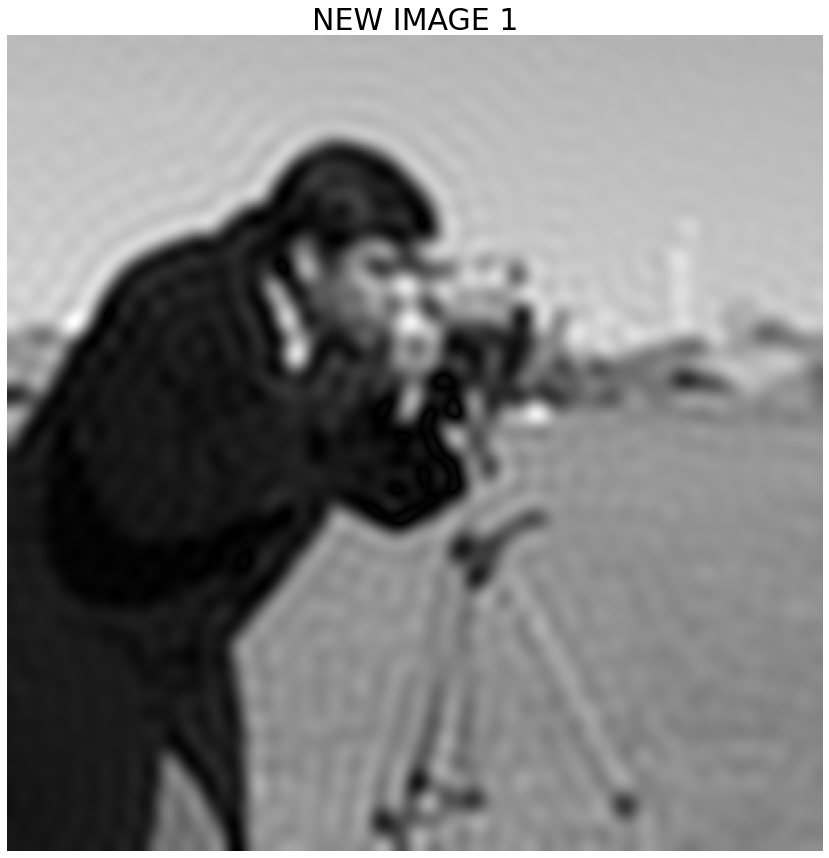

In [6]:
image1=np.zeros(b)
print(image1.shape)
for i in range(b[0]):
    for j in range(b[1]):
        image1[i][j]=new_image_padding_filtered[i+c[0]][j+c[1]]
fig, dx = plt.subplots( figsize=(15, 15), sharex=True,sharey=True)

dx.imshow(image1,cmap='gray')
dx.axis('off')
dx.set_title('NEW IMAGE 1',size=30)

# Question 2 b

Text(0.5, 1.0, 'Question 2 image')

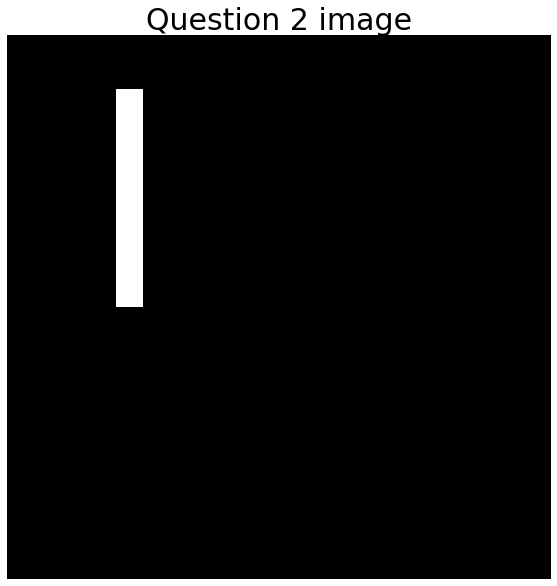

In [7]:
image2 = np.zeros((100,100))
image2[10:50, 20:25] = 255
fig, ex = plt.subplots( figsize=(10, 10), sharex=True,sharey=True)

ex.imshow(image2,cmap='gray')
ex.axis('off')
ex.set_title('Question 2 image',size=30)

# Sinogram

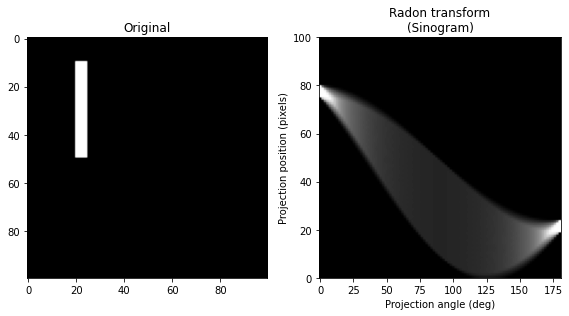

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = image2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape))
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

# Filtered reconstruction

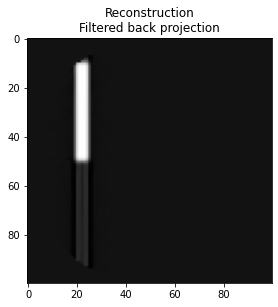

In [9]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='hamming')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1) = plt.subplots(1, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

plt.show()

# No filtered back projection, and theta=[45,10,5,2,1]

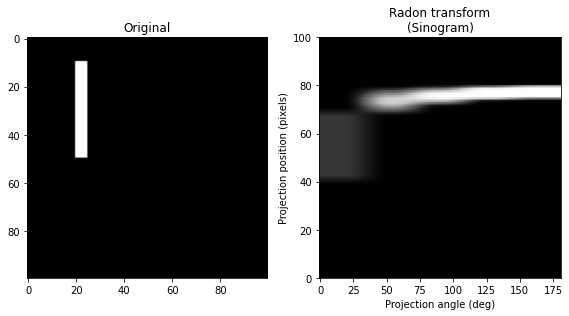

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = [45,10,5,2,1]
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

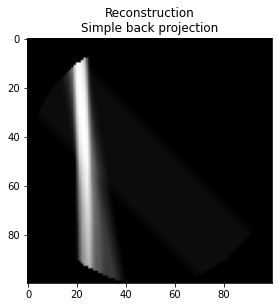

In [11]:
reconstruction_fbp = iradon(sinogram, theta=theta,filter_name=None)

fig, (ax1) = plt.subplots(1, figsize=(8, 4.5),sharex=True, sharey=True)
ax1.set_title("Reconstruction\nSimple back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

plt.show()